In [53]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from pathlib import Path
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [54]:
spy_df = pd.read_csv(Path("./Resources/spy.csv"))
spy_df= spy_df.drop(columns=['Open','High','Low','Day','Weekday','Week','Month','Year','Volume'])
spy_df

,Date,Close
0,1/2/14,154.989548
1,1/3/14,154.964035
2,1/6/14,154.515045
3,1/7/14,155.464020
4,1/8/14,155.497864
...,...,...
2300,2/22/23,398.540008
2301,2/23/23,400.660004
2302,2/24/23,396.380005
2303,2/27/23,397.730011


In [55]:
spy_df
# spy_df = spy_df.drop('Close')
# spy_df=spy_df.groupby(['Date','Volume'],as_index=False)
# spy_df =spy_df.rename(columns={'Date':'ds','Close':'y'})

,Date,Close
0,1/2/14,154.989548
1,1/3/14,154.964035
2,1/6/14,154.515045
3,1/7/14,155.464020
4,1/8/14,155.497864
...,...,...
2300,2/22/23,398.540008
2301,2/23/23,400.660004
2302,2/24/23,396.380005
2303,2/27/23,397.730011


In [56]:
print(min(spy_df['Date']))
print(max(spy_df['Date']))

1/10/14
9/9/22


In [57]:
spy_df = pd.read_csv(Path("./Resources/spy.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True).dropna()
spy_df= spy_df['Close']
spy_df = spy_df.reset_index()
spy_df.columns= ["ds","y"]
spy_df



,ds,y
0,2014-01-02,154.989548
1,2014-01-03,154.964035
2,2014-01-06,154.515045
3,2014-01-07,155.464020
4,2014-01-08,155.497864
...,...,...
2300,2023-02-22,398.540008
2301,2023-02-23,400.660004
2302,2023-02-24,396.380005
2303,2023-02-27,397.730011


In [58]:

train = spy_df[spy_df['ds'] < '1/2/23']
test = spy_df[spy_df['ds']>='1/2/23']
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365, freq="D")
forecast = m.predict(future)


18:23:31 - cmdstanpy - INFO - Chain [1] start processing
18:23:31 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-02,155.085767,141.150677,177.735176,155.085767,155.085767,4.765261,4.765261,4.765261,0.174227,0.174227,0.174227,4.591034,4.591034,4.591034,0.0,0.0,0.0,159.851028
1,2014-01-03,155.142777,141.447784,179.109046,155.142777,155.142777,4.857020,4.857020,4.857020,0.119099,0.119099,0.119099,4.737921,4.737921,4.737921,0.0,0.0,0.0,159.999797
2,2014-01-06,155.313808,142.200740,179.098231,155.313808,155.313808,5.155986,5.155986,5.155986,0.171380,0.171380,0.171380,4.984606,4.984606,4.984606,0.0,0.0,0.0,160.469794
3,2014-01-07,155.370818,143.185038,180.122175,155.370818,155.370818,5.249055,5.249055,5.249055,0.256753,0.256753,0.256753,4.992302,4.992302,4.992302,0.0,0.0,0.0,160.619873
4,2014-01-08,155.427828,141.125026,179.220746,155.427828,155.427828,5.177532,5.177532,5.177532,0.217572,0.217572,0.217572,4.959960,4.959960,4.959960,0.0,0.0,0.0,160.605361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,2023-12-26,389.984345,351.984231,431.604148,353.609715,425.794099,3.313458,3.313458,3.313458,0.256753,0.256753,0.256753,3.056705,3.056705,3.056705,0.0,0.0,0.0,393.297804
2627,2023-12-27,389.953930,353.963440,436.151010,353.463024,425.949333,3.475997,3.475997,3.475997,0.217572,0.217572,0.217572,3.258425,3.258425,3.258425,0.0,0.0,0.0,393.429927
2628,2023-12-28,389.923514,351.608706,433.685346,353.229353,426.104568,3.646081,3.646081,3.646081,0.174227,0.174227,0.174227,3.471853,3.471853,3.471853,0.0,0.0,0.0,393.569595
2629,2023-12-29,389.893098,351.085143,431.499093,353.020899,426.255737,3.810273,3.810273,3.810273,0.119099,0.119099,0.119099,3.691175,3.691175,3.691175,0.0,0.0,0.0,393.703371


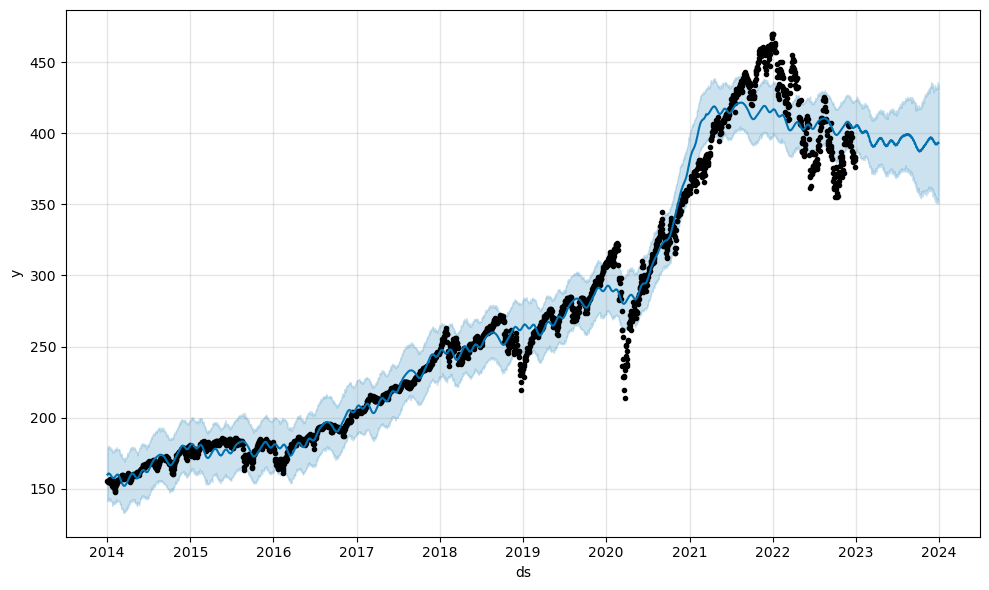

In [60]:
forecast_fig = m.plot(forecast)

In [61]:
# Make a prediction using the testing data
testing_predections = m.predict(test)

In [ ]:
# # Print the balanced_accuracy score of the model
# forecast_sub = forecast[['ds','yhat']]
# test = test[['ds','y']]
# eval_df = test.merge(forecast_sub, on=['ds'],how='left')
# eval_df['abs_error'] = abs(eval_df['y']-eval_df['yhat'])
# eval_df['daily_FA'] = 1-(eval_df['abs_error']/eval_df['y'])
# total_y = sum(eval_df['y'])
# total_error = sum(eval_df['abs_error'])
# forecast_acc= 1-(total_error/total_y)
# print(forecast_acc)

0.9781191123301755


In [ ]:
#Performance Metrics 
# Initial training period.
initial= 
initial= 
#Period length that we perform the cross validation for.
period= 
period=
#Horizon of prediction essentially for each fold.
horizon = 
horizon=
fb_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon)
# Performance Metrics of fb_cv
performance_metrics(fb_cv)